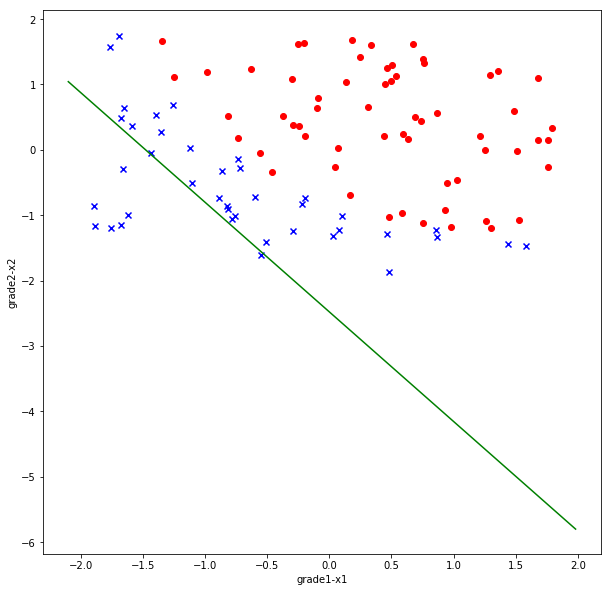

In [318]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# dont forget to normalize X_train before all
# if you forget tou cannot see graphs properly
def Normalize(X):
    return (X - np.mean(X)) / np.std(X)

#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
# READING FROM CSV FILE: 
df      = pd.read_csv('data2.csv')
X       = df.loc[:, ['grade1', 'grade2']]
y       = df.loc[:, ['label']]
X_init  = X.values
y_init  = y.values
X_temp  = Normalize(X_init)
X_temp  = np.column_stack([np.ones(X_temp.shape[0]), X_temp])  
y_temp  = y_init.reshape(y_init.shape[0],)

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.20, random_state=None, shuffle=False)
m, n = X_train.shape # m = 80 and n = 3
np.random.seed(499)
theta = np.random.rand(n)
# theta shape is (3, ) --> theta vector = array([0.95381072, 0.64552442, 0.38490809])
#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
wholeClass = np.column_stack([X_temp, y_temp])
posClass = wholeClass[wholeClass[:, 3] == 1]
posClass = posClass[:, 1:3]
negClass = wholeClass[wholeClass[:, 3] == 0]
negClass = negClass[:, 1:3]

# You can pick the decision boundary to look at the graph
# Red Circles are belong to positive class
# Blue Markers are belong to negative class
# Choose wisely the decision boundary
plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(posClass[:,0], posClass[:,1], color='red', marker='o', label='Positive')
plt.scatter(negClass[:,0], negClass[:,1], color='blue', marker='x')
plt.xlabel('grade1-x1')
plt.ylabel('grade2-x2')

'''
To plot decision boundary: 
    - h_theta must equal to 0.5, so
    - theta0 + theta1*x1 + theta2*x2 = 0 (because of the sigmoid function)
    - sigmoid = 1 / 1 + e^(-z)
    
We already know the initial theta, so we can plot initial decision boundary
'''
# to plot initial decision boundary use: theta2*x2 = -(theta0 + theta1*x1)
# x2 = -(theta0 + theta1*x1) / theta2
# y = a*x + b, y = x2, x = x1, a = -theta0/theta2, b=theta1/theta2
# define lower and higher bound of x axis
minx, maxx = plt.xlim()
x1 = np.linspace(minx, maxx, 50)
plt.plot(x1, -(theta[0] + theta[1]*x1)/theta[2], color='green')
plt.show()
#------------------------------------------------------------------------------------------------------------------

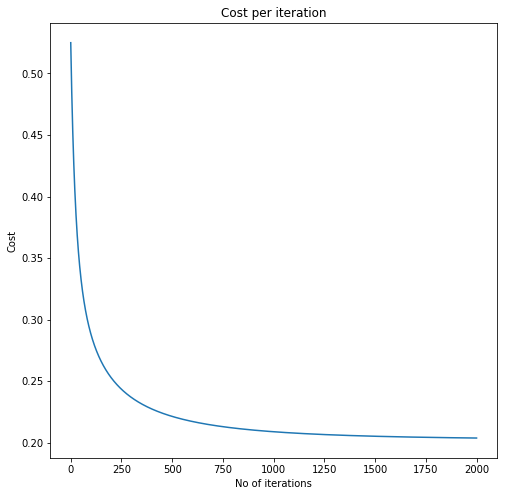

Initial Theta: [0.95381072 0.64552442 0.38490809]
Optimized Theta: [1.26011777 3.56450448 3.46313831]
Minimized Cost: 0.20384118555694217


In [319]:
def Hypothesis(X, theta):
    h = Sigmoid(np.dot(X, theta))
    return h

def Sigmoid(z):
    g = 1.0 / (1.0 + np.exp(-z))
    return g

def CostFunction(X, y, theta, m):
    h = Hypothesis(X, theta)
    # np.sum(y*h) and np.dot(y,h) - np.dot(h, y) are the same thing because y and h is a vector 
    # with shape (m, ) then you can dot product anyway
    # cost1 => when y == 1 and cost => when y == 0
    """
    cost1 = y*np.log(h)
    cost2 = (1-y)*np.log(1-h)
    J = (-1.0/m)*(np.sum(cost1+cost2))
    """
    cost1 = np.dot(y, np.log(h))
    cost2 = np.dot((1.0-y), np.log(1.0-h))
    J = (-1.0/m)*(cost1+cost2)
    return J

def GradientDescent(X, y, theta, alpha, num_iterations, m):
    costs = []
    for x in range(num_iterations):
        costs.append(CostFunction(X, y, theta, m))
        h = Hypothesis(X, theta)
        delta = np.dot(X.T, h-y)
        grad  = (alpha / m) * delta
        theta = theta - grad
    costs.append(CostFunction(X, y, theta, m))
    return theta, costs

def Predict(X, theta):
    result = Hypothesis(X, theta)
    if result >= 0.5:
        return 1
    else:
        return 0
    
def PredictAll(X_t, y_t, theta):
    score = 0
    size  = y_t.shape[0]
    predictions = np.full(y_t.shape, None)
    for x in range(size):
        tmp = Predict(X_t[x], theta)
        predictions[x] = tmp
        if tmp == y_t[x]:
            score += 1
    return (score / size) * 100, predictions

# you can change alpha and num_iterations to see change in cost and gradient descent
alpha = 0.1
num_iterations = 2000

Ntheta, costs = GradientDescent(X_train, y_train, theta, alpha, num_iterations, m)
score, pred = PredictAll(X_test, y_test, Ntheta)

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(costs) 
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()
print('Initial Theta:', theta)
print('Optimized Theta:', Ntheta)
print('Minimized Cost:', CostFunction(X_train, y_train, Ntheta, m))

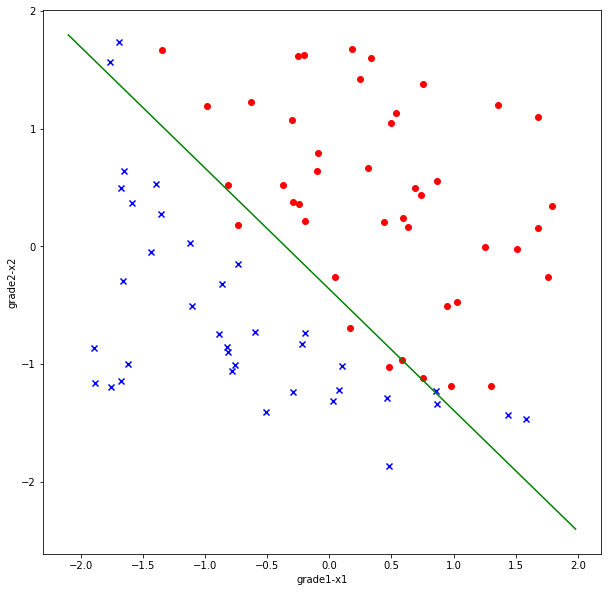

In [320]:
# DECISION BOUNDARY
# showed on training set
trainClass = np.column_stack([X_train, y_train])
posTrainClass = trainClass[trainClass[:, 3] == 1]
posTrainClass = posTrainClass[:, 1:3]
negTrainClass = trainClass[trainClass[:, 3] == 0]
negTrainClass = negTrainClass[:, 1:3]

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(posTrainClass[:,0], posTrainClass[:,1], color='red', marker='o')
plt.scatter(negTrainClass[:,0], negTrainClass[:,1], color='blue', marker='x')
plt.xlabel('grade1-x1')
plt.ylabel('grade2-x2')

tr_min, tr_max = plt.xlim()
tr_x1 = np.linspace(tr_min, tr_max, 50)
plt.plot(tr_x1, -(Ntheta[0] + Ntheta[1]*tr_x1) / Ntheta[2], color='green')
plt.show()

Score is among 20 test cases: % 90.0


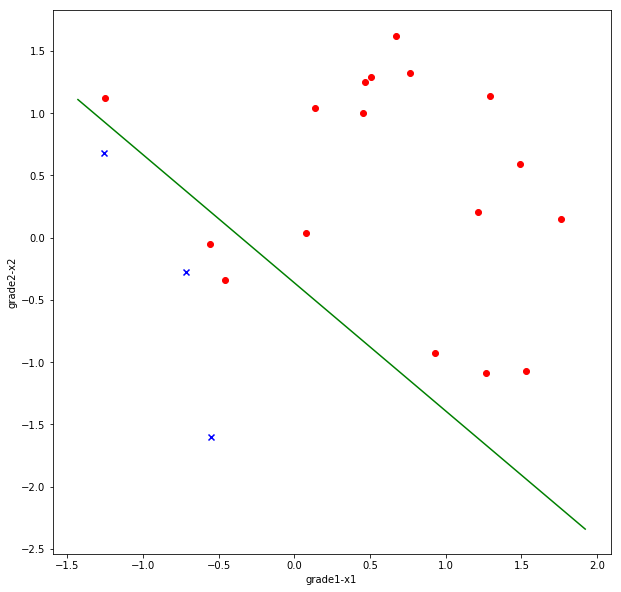

In [321]:
# APPLY THIS FOR TEST CLASS
# gives %90 score, so 2 of the red dots are in wrong side of the line
testClass = np.column_stack([X_test, y_test])
posTestClass = testClass[testClass[:, 3] == 1]
posTestClass = posTestClass[:, 1:3]
negTestClass = testClass[testClass[:, 3] == 0]
negTestClass = negTestClass[:, 1:3]

print('Score is among 20 test cases: %',score)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(posTestClass[:,0], posTestClass[:,1], color='red', marker='o')
plt.scatter(negTestClass[:,0], negTestClass[:,1], color='blue', marker='x')
plt.xlabel('grade1-x1')
plt.ylabel('grade2-x2')

te_min, te_max = plt.xlim()
te_x1 = np.linspace(te_min, te_max, 50)
plt.plot(te_x1, -(Ntheta[0] + Ntheta[1]*te_x1) / Ntheta[2], color='green')
plt.show()

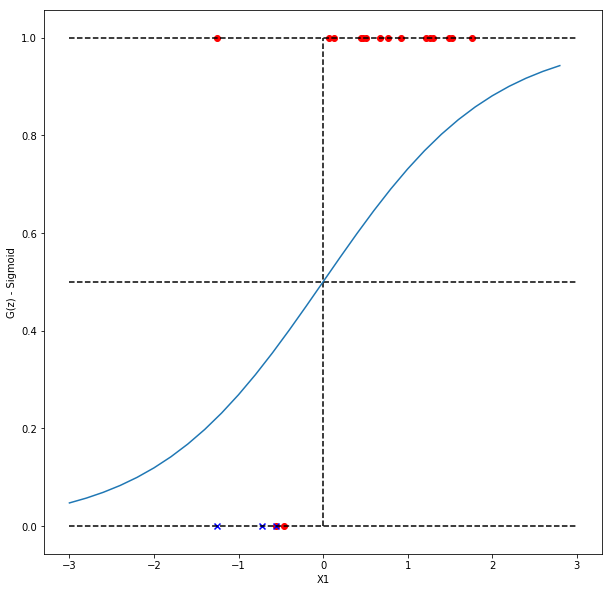

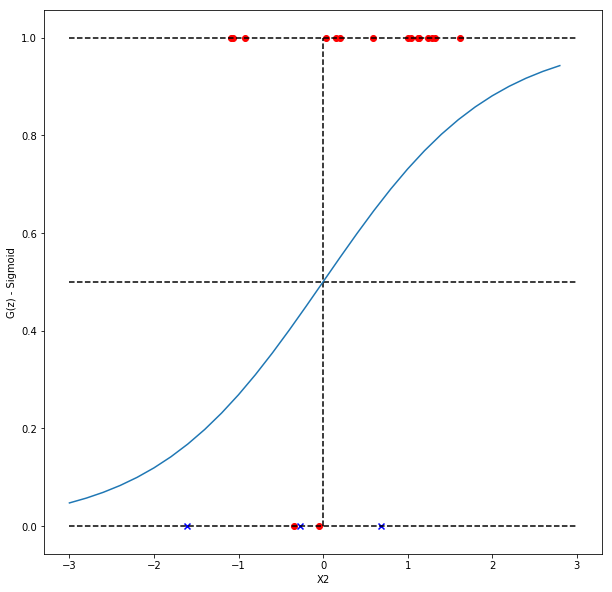

In [322]:
# SHOW SIGMOID FUNCTION FOR THE TEST CLASS:
# We already seperate test class as positive and negative
# Apply sigmoid function and see the results
# First plot the sigmoid function:

sigTestClass = np.column_stack([X_test, y_test])
posSigClass  = sigTestClass[sigTestClass[:, 3] == 1]
posSigClass  = posSigClass[:, :-1]
negSigClass  = sigTestClass[sigTestClass[:, 3] == 0]
negSigClass  = negSigClass[:, :-1]

x = np.arange(-3, 3, 0.2)
sig = Sigmoid(x)

predPos = []
predNeg = []
for i in range(len(posSigClass)):
    pred = Predict(posSigClass[i], Ntheta)
    predPos.append(pred)

for j in range(len(negSigClass)):
    pred = Predict(negSigClass[j], Ntheta)
    predNeg.append(pred)
    
# FOR X1:
plt.scatter(posSigClass[:,1], predPos, color='red', marker='o')
plt.scatter(negSigClass[:,1], predNeg, color='blue', marker='x')
plt.hlines(0.5, xmin=-3, xmax=3, linestyles='dashed')
plt.hlines(1.0, xmin=-3, xmax=3, linestyles='dashed')
plt.hlines(0.0, xmin=-3, xmax=3, linestyles='dashed')
plt.vlines(0, ymin=0, ymax=1, linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('G(z) - Sigmoid')
plt.plot(x, sig)
plt.show()

# FOR X2:
plt.scatter(posSigClass[:,2], predPos, color='red', marker='o')
plt.scatter(negSigClass[:,2], predNeg, color='blue', marker='x')
plt.hlines(0.5, xmin=-3, xmax=3, linestyles='dashed')
plt.hlines(1.0, xmin=-3, xmax=3, linestyles='dashed')
plt.hlines(0.0, xmin=-3, xmax=3, linestyles='dashed')
plt.vlines(0, ymin=0, ymax=1, linestyles='dashed')
plt.xlabel('X2')
plt.ylabel('G(z) - Sigmoid')
plt.plot(x, sig)
plt.show()